###Sarcasm Detection

####Problem Statement:
To check for the Sarcasm in a statement using Multinomial Naive Bayes and predicting the model by training the model on a pre-determined database.

####Imports

In [ ]:
import numpy as np
import pandas as pd
import re

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

####Dataset:
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .




In [ ]:
df = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines = True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [ ]:
#No. of unique categories of tweets
df['is_sarcastic'].nunique()     #the dataset contains positive and negative tweets

2

####Pre-Processing:

In [ ]:
data=df[['is_sarcastic','headline']]

In [ ]:
#Separating positive and negative tweets
data_pos = data[data['is_sarcastic'] == 1]
data_neg = data[data['is_sarcastic'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(10000)]
data_neg = data_neg.iloc[:int(10000)]

In [ ]:
tweets = pd.concat([data_pos, data_neg])
tweets

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
...,...,...
19154,0,"julianne moore on 'freeheld,' marriage equalit..."
19156,0,report: former nfl kicker threatened students ...
19160,0,princess charlotte is 'bonding' quite a lot wi...
19162,0,wwii veteran reunites with his long-lost love ...


In [ ]:
tweets.shape

(20000, 2)

In [ ]:
# Convert text to lowercase
tweets['headline'] = tweets['headline'].str.strip().str.lower()
text_data=tweets.copy()

####Data Visualization:

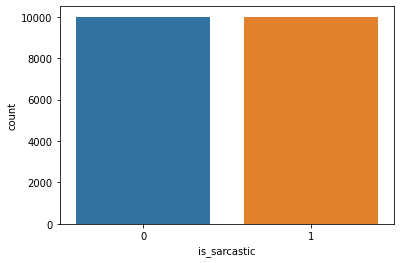

In [ ]:
import seaborn as sns
sns.countplot(x='is_sarcastic', data=tweets)

##Multinomial Naive Bayes

The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

In [ ]:
text_data=text_data.dropna(axis=0,how='any')  #features having missing value/s are removed.

In [ ]:
# Split into training and testing data
text_x = text_data['headline']
text_y = text_data['is_sarcastic']
text_x, text_x_test, text_y, text_y_test = train_test_split(text_x,text_y, stratify=text_y, test_size=0.05, random_state=42)

In [ ]:
text_x.shape

(19000,)

In [ ]:
text_x_test.shape

(1000,)

In [ ]:
text_y.shape

(19000,)

In [ ]:
text_y_test.shape

(1000,)

**Vectorization:** To make sense of this data for our machine learning algorithm, we will need to convert each review to a numerical representation that we call vectorization.

In [ ]:
#Vectorize tweets to numbers
from scipy.sparse import lil_matrix, csr_matrix
vec = CountVectorizer(stop_words='english')
text_x = vec.fit_transform(text_x)
text_x=lil_matrix(text_x).toarray()
text_x_test = vec.transform(text_x_test)
text_x_test=lil_matrix(text_x_test).toarray()

In [ ]:
model = MultinomialNB() #Running the Model
model.fit(text_x, text_y)

MultinomialNB()

In [ ]:
text_ypred=model.predict(text_x_test) #Predicting Values

In [ ]:
tt = round(model.score(text_x_test,text_y_test),2)*100 #Score
print(tt,"%")

79.0 %


Prediction on the basis of review.

In [ ]:
tweet = input("Tweet: ")
a = model.predict(vec.transform([tweet]))

Tweet: I run at nights.


In [ ]:
if a == 1:
  print("Sarcasm")
else:
  print("Not Sarcasm")

Not Sarcasm
